# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from datetime import timedelta
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("tabela_1_Minas_x_Flamengo.csv")

In [5]:
df['Tempo'] = df['Tempo'].apply(lambda x: datetime.strptime(x, '%M:%S'))

In [6]:
df['Tempo'] = df['Tempo'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [7]:
df['Tempo'] = df['Tempo'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [8]:
df

,Unnamed: 0,Quarto,Tempo,Time,placar_casa,placar_visitante,Indicador,Nomes
0,0,4,0,NaN,85,93,fim_partida,
1,1,4,0,NaN,85,93,fim_quarto,NaN
2,2,4,1,MIN,85,93,3_Pts_T,Queirós
3,3,4,5,FLA,85,93,LL_Pts_C,Marquinhos
4,4,4,5,FLA,85,92,LL_Pts_C,Marquinhos
...,...,...,...,...,...,...,...,...
477,477,1,600,MIN,0,0,substituicao_entra,Leandrinho
478,478,1,600,MIN,0,0,substituicao_entra,Alex
479,479,1,600,MIN,0,0,substituicao_entra,Davi
480,480,1,600,MIN,0,0,substituicao_entra,Tyrone


In [9]:
# df.to_csv('tempo.csv')

In [10]:
t1 = df[df['Quarto'] == 1]
t2 = df[df['Quarto'] == 2]
t3 = df[df['Quarto'] == 3]
t4 = df[df['Quarto'] == 4]
t5 = df[df['Quarto'] == 5]
t6 = df[df['Quarto'] == 6]
t7 = df[df['Quarto'] == 7]

In [11]:
primeiro_quarto = t1.copy()
segundo_quarto = t2.copy()
terceiro_quarto = t3.copy()
quarto_quarto = t4.copy()
quinto_quarto = t5.copy()
sexto_quarto = t6.copy()
setimo_quarto = t7.copy()

In [12]:
primeiro_quarto['Tempo'] = primeiro_quarto['Tempo'].apply(lambda x: (x-(600 * 1)) * -1)
segundo_quarto['Tempo'] = segundo_quarto['Tempo'].apply(lambda x: (x-(600 * 2)) * -1)
terceiro_quarto['Tempo'] = terceiro_quarto['Tempo'].apply(lambda x: (x-(600 * 3)) * -1)
quarto_quarto['Tempo'] = quarto_quarto['Tempo'].apply(lambda x: (x-(600 * 4)) * -1)
quinto_quarto['Tempo'] = quinto_quarto['Tempo'].apply(lambda x: (x-(600 * 5)) * -1)
sexto_quarto['Tempo'] = sexto_quarto['Tempo'].apply(lambda x: (x-(600 * 6)) * -1)
setimo_quarto['Tempo'] = setimo_quarto['Tempo'].apply(lambda x: (x-(600 * 7)) * -1)

In [13]:
jogada_jogada = pd.concat([setimo_quarto, sexto_quarto, quinto_quarto, quarto_quarto, terceiro_quarto,
                          segundo_quarto, primeiro_quarto], ignore_index=True)

In [14]:
jogada_jogada.sort_values(by='Tempo', ascending=False, inplace=True)

In [15]:
jogada_jogada.head(20)

,Unnamed: 0,Quarto,Tempo,Time,placar_casa,placar_visitante,Indicador,Nomes
0,0,4,2400,NaN,85,93,fim_partida,
1,1,4,2400,NaN,85,93,fim_quarto,NaN
2,2,4,2399,MIN,85,93,3_Pts_T,Queirós
4,4,4,2395,FLA,85,92,LL_Pts_C,Marquinhos
5,5,4,2395,FLA,85,91,FR,Marquinhos
6,6,4,2395,MIN,85,91,FC,Alex
3,3,4,2395,FLA,85,93,LL_Pts_C,Marquinhos
7,7,4,2392,FLA,85,91,RD,Léo Demétrio
8,8,4,2392,MIN,85,91,2_Pts_T,Cobb
9,9,4,2392,MIN,85,91,RO,Cobb


In [16]:
a = jogada_jogada[(jogada_jogada['Indicador'] == '3_Pts_C') | (jogada_jogada['Indicador'] == '3_Pts_T') | 
                  (jogada_jogada['Indicador'] == '2_Pts_C') | (jogada_jogada['Indicador'] == '2_Pts_C') |
                  (jogada_jogada['Indicador'] == 'LL_Pts_C') | (jogada_jogada['Indicador'] == 'LL_Pts_C')]

In [17]:
# jogada_jogada.to_csv('tempo1.csv')

In [18]:
# a.set_index("Tempo", inplace=True)

In [19]:
# a[['placar_casa', 'placar_visitante']].plot()

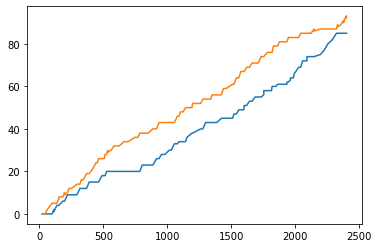

In [20]:
fig, ax = plt.subplots()
x = a['Tempo']
y = a[['placar_casa', 'placar_visitante']]
ax.plot(x, y)

# tentar colocar uma minha vermelha entre os quartos, para separar visualmente 
#threshold = 1800
#ax.fill_between(0, 1, where=y > threshold,
#                color='green', alpha=0.5, transform=ax.get_xaxis_transform())

In [40]:
a['dif'] = a['placar_casa'] - a['placar_visitante']

<ipython-input-40-7e02972497d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['dif'] = (a['placar_casa']) - (a['placar_visitante'])


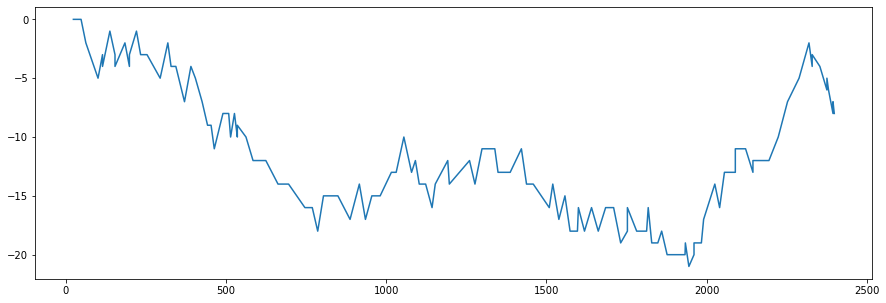

In [41]:
plt.figure(figsize=(15,5))
plt.plot(a['Tempo'], a['dif'])